<a href="https://colab.research.google.com/github/j0ngle/Machine-Learning-Projects/blob/main/CIFAR10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 3, 32, 32])
Shape of y:  torch.Size([64]) torch.int64


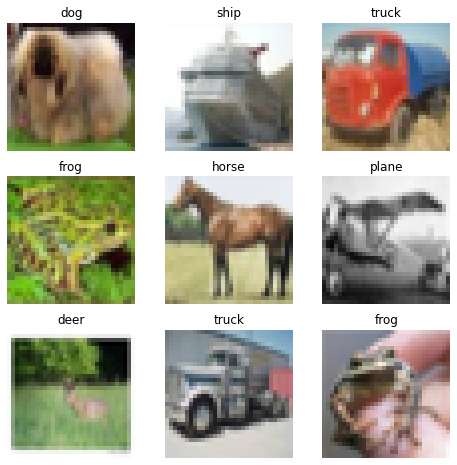

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(img.squeeze().permute(1, 2, 0))
plt.show()

# Network time

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.convstack = nn.Sequential(
        nn.Conv2d(3, 32, 5, stride=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(),
        nn.Conv2d(32, 64, 5, stride=2),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(),
        nn.Conv2d(64, 128, 5, stride=2),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(),
        nn.Conv2d(128, 256, 3),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(),
        # nn.Conv2D(256, 512, 5, stride=2),
        # nn.BatchNorm1d(512),
        # nn.LeakyReLU()
    )

    self.dense = nn.Sequential(
        nn.Linear(2*2*256, 1000),
        nn.Linear(1000, 100),
        nn.Linear(100, 10)
    )

    self.flatten = nn.Flatten()
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.convstack(x)
    x = torch.flatten(x, 1)
    x = self.dense(x)
    # x = self.dense(x)
    # outputs = self.activation(x)

    return x

model = ConvNet().to(device)

Using cpu device


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    #Backprop
    #Sets optimizers gradients to zero
    optimizer.zero_grad()

    #computes gradient of current tensor
    loss.backward()

    #Updates gradients (?)
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch*len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, criterion, optimizer)
    test(test_dataloader, model, criterion)
print("Done!")

Epoch 1
-------------------------------


NameError: ignored

In [ ]:
PATH = './cifar_net.pth'

In [ ]:
torch.save(model.state_dict(), PATH)

  # Testing the Network


GroundTruth:    f r o g
GroundTruth:  t r u c k
GroundTruth:  t r u c k
GroundTruth:    d e e r


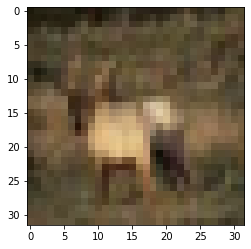

In [ ]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

for j in range(4):
  plt.imshow(torchvision.utils.make_grid(images[j]).permute(1, 2, 0))
  print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]]))


In [ ]:
net = ConvNet()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

FileNotFoundError: ignored